# Spotify Training Model on Dataset of 70s
### Loading necessary libraries

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf


In [2]:
df = pd.read_csv("dataset-of-70s.csv")
df.head(10)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Porque?,Reginaldo Rossi,spotify:track:28KC2wl7jDv6Ms1Uc0OMpm,0.669,0.547,1,-9.873,0,0.0576,0.3530,0.000000,0.0515,0.730,131.073,141067,4,28.79763,6,0
1,Free Jazz,Maria Teresa Luciani,spotify:track:0zagn8PNnM7pM8pz1gXOAD,0.291,0.300,1,-14.054,0,0.0326,0.9050,0.492000,0.1180,0.039,75.619,228224,4,44.10303,9,0
2,Reject of Society,Crass,spotify:track:18eNASEiuAhO2ML5LBIoG4,0.355,0.968,7,-4.687,1,0.1890,0.0504,0.000000,0.1300,0.768,181.291,66800,3,25.23004,6,0
3,Yeah !,The Jets,spotify:track:1UlJzHc8E5EprQFJxjSyPL,0.598,0.891,6,-11.904,1,0.0552,0.0183,0.836000,0.5790,0.826,144.383,155395,4,55.62066,7,0
4,Gotta Find A Way,The Moments,spotify:track:1Jtlirju8tUXTtvyZJAN5v,0.440,0.376,5,-10.939,1,0.0482,0.3480,0.000000,0.0815,0.358,130.438,218333,4,34.90979,12,1
5,What Shall We Do When We All Go Out?,Mike Seeger,spotify:track:3mjhB6xOe5d8HfWbUFApHR,0.618,0.167,7,-16.755,1,0.0451,0.8280,0.000003,0.1970,0.651,175.951,132667,4,58.27935,7,0
6,Beautiful Sunday,Daniel Boone,spotify:track:6DqNZJ4hhBYd8qj9WbpSTJ,0.676,0.463,9,-13.155,1,0.0306,0.3090,0.000000,0.2880,0.910,121.923,182133,4,36.28697,7,1
7,The Man With The Child In His Eyes,Kate Bush,spotify:track:4xjVfArXNQRxAvsUpjmfMt,0.249,0.261,0,-10.592,1,0.0334,0.9620,0.001540,0.1360,0.195,90.007,158693,4,33.62341,8,1
8,Psychedelic Shack,The Temptations,spotify:track:5kx4xMErn45NZvEChKiqdo,0.663,0.822,5,-13.119,0,0.0590,0.1990,0.000009,0.0626,0.818,108.940,230293,4,60.05568,8,1
9,Tell It Like It Is,Andy Williams,spotify:track:7MYHtpI1ebzt1lkAxgNDEZ,0.522,0.440,6,-13.258,0,0.0350,0.4340,0.000000,0.2180,0.295,97.475,159760,3,38.69467,7,1


In [3]:
df.shape

(7766, 19)

## Shuffling data

In [4]:
df = df.sample(frac=1)

## Dropping categorical features

In [5]:
X = df.drop(["track","artist","uri","target"],axis=1)
X.shape

(7766, 15)

In [6]:
y = df["target"]

## Calculating the number of hit flop songs

In [7]:
hit_flop_count = y.value_counts()
hit_flop_count

1    3883
0    3883
Name: target, dtype: int64

In [8]:
y = y.values

## Scaling inputs

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

## Splitting the data into train test and validation set 

In [10]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(scaled_X,y,test_size=0.1 ,random_state=1)

In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=(1/9), random_state=1)

In [12]:
x_train.shape, x_test.shape, x_val.shape

((6212, 15), (777, 15), (777, 15))

## The Deep learning algorithm 

In [13]:
nn = 200 #hiden layers
target_count = 2

In [14]:
model_70 = tf.keras.Sequential()
model_70.add(tf.keras.layers.Flatten())

model_70.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# first hidden  layer
model_70.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# second hidden layer
model_70.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# third hidden layer

In [15]:
model_70.add(tf.keras.layers.Dense(target_count, activation=tf.nn.softmax))# output layer

In [16]:
model_70.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training model

In [17]:
model_fit = model_70.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), batch_size=100)

Epoch 1/20
63/63 [==============================] - 0s 4ms/step - loss: 0.5387 - accuracy: 0.7201 - val_loss: 0.5028 - val_accuracy: 0.7465
Epoch 2/20
63/63 [==============================] - 0s 2ms/step - loss: 0.4913 - accuracy: 0.7658 - val_loss: 0.4918 - val_accuracy: 0.7606
Epoch 3/20
63/63 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.7737 - val_loss: 0.4845 - val_accuracy: 0.7542
Epoch 4/20
63/63 [==============================] - 0s 2ms/step - loss: 0.4634 - accuracy: 0.7812 - val_loss: 0.5035 - val_accuracy: 0.7336
Epoch 5/20
63/63 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.7896 - val_loss: 0.4806 - val_accuracy: 0.7735
Epoch 6/20
63/63 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.7930 - val_loss: 0.4813 - val_accuracy: 0.7387
Epoch 7/20
63/63 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.7973 - val_loss: 0.5139 - val_accuracy: 0.7246
Epoch 8/20
63/63 [==

## Predictions

In [18]:
predictions = model_70.predict(x_test)

## Visualize Neural Network Loss History

### Loss variation plot

In [19]:
training_loss = model_fit.history['loss']
validation_loss = model_fit.history['val_loss']
epoch_count1 = range(1, len(training_loss) + 1)

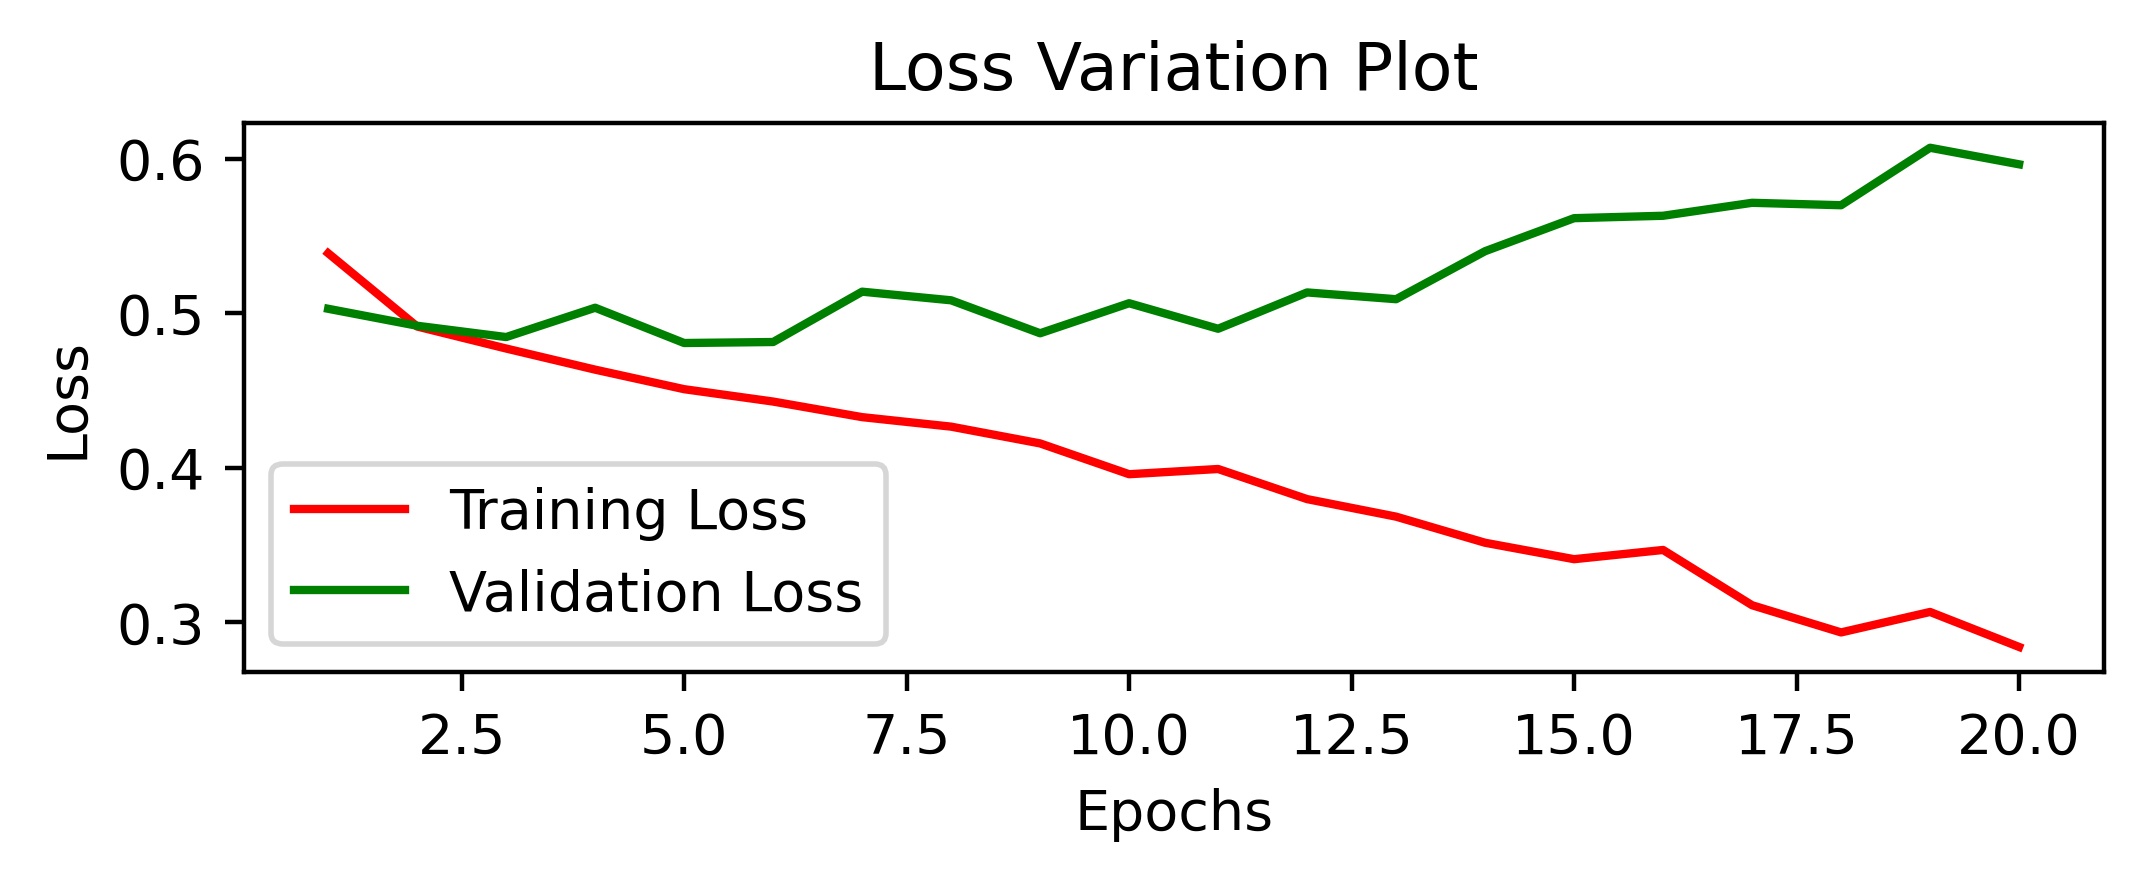

In [20]:
mpl.rcParams['figure.dpi'] = 400
plt.subplot(2,1,2)
plt.title('Loss Variation Plot')
plt.plot(epoch_count1, training_loss, color='red', label='Training Loss')
plt.plot(epoch_count1, validation_loss, color='green', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### Accuracy variation plot

In [21]:
training_acc = model_fit.history['accuracy']
validation_acc = model_fit.history['val_accuracy']
epoch_count2 = range(1, len(training_acc) + 1)

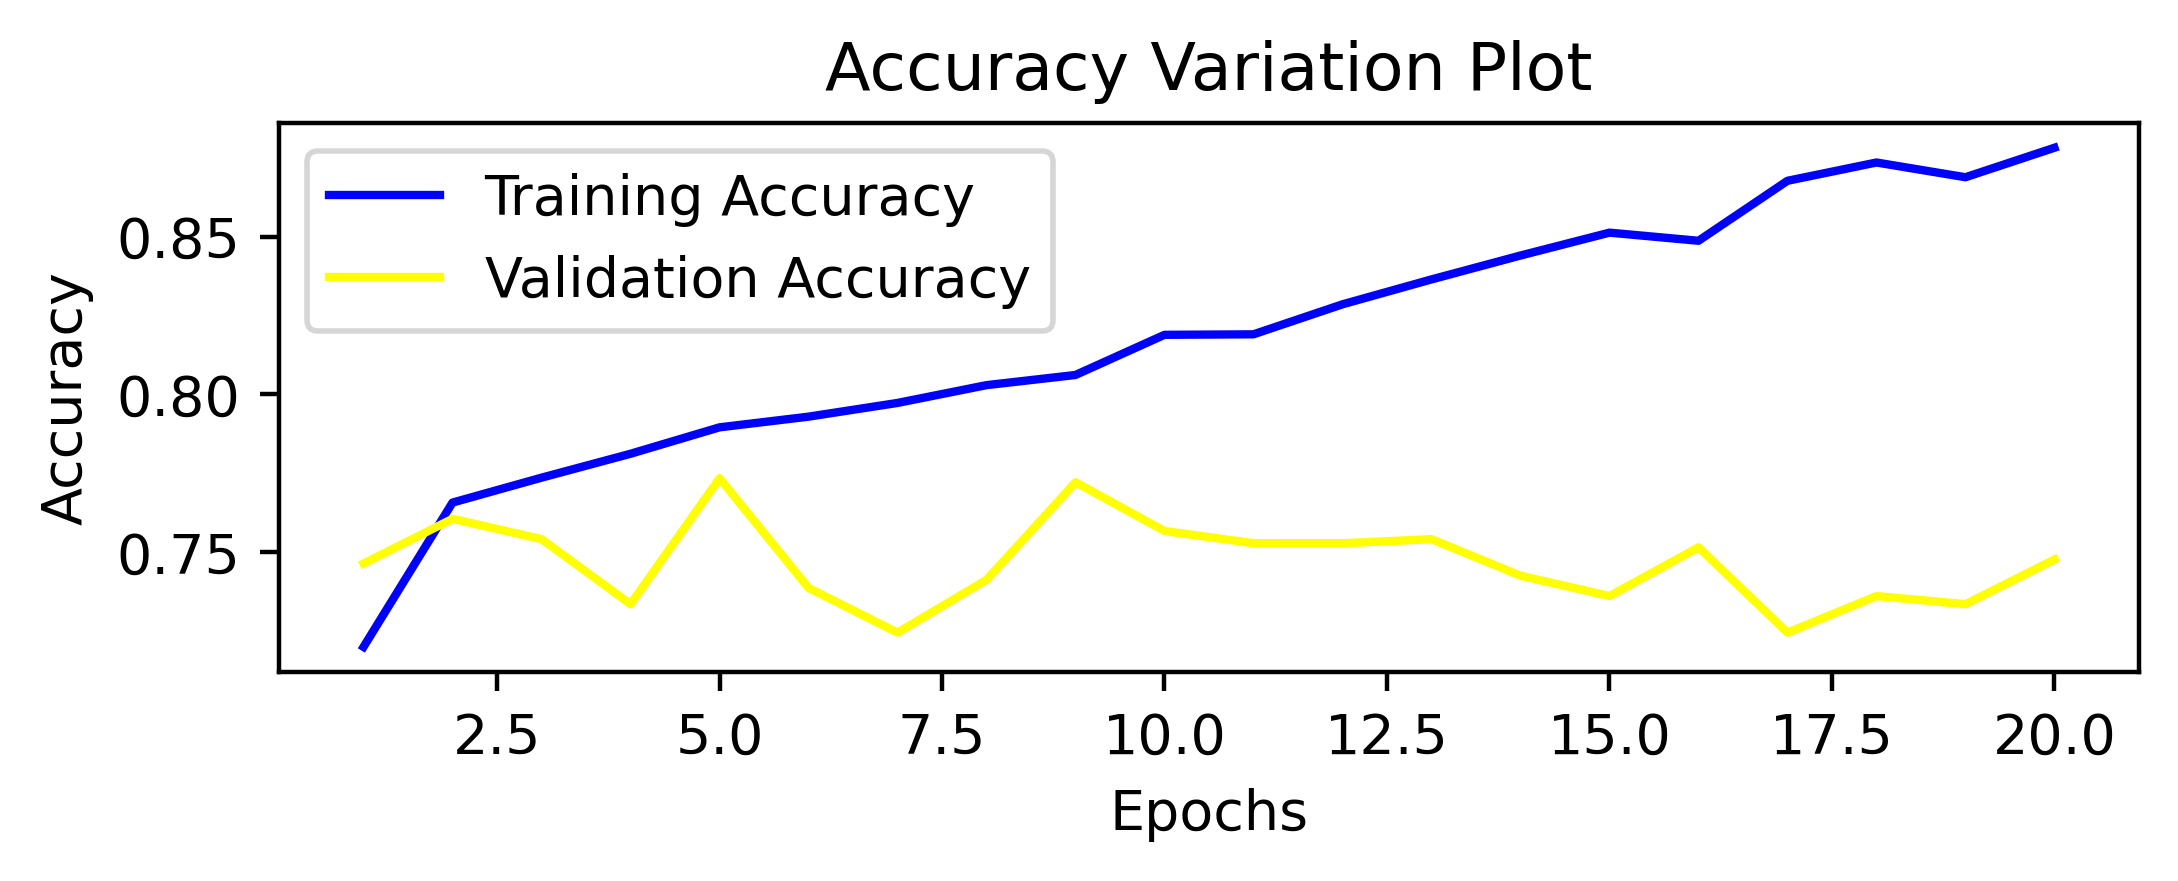

In [22]:
mpl.rcParams['figure.dpi'] = 400
plt.subplot(2,1,2)
plt.title('Accuracy Variation Plot')
plt.plot(epoch_count2, training_acc, color='blue', label='Training Accuracy')
plt.plot(epoch_count2, validation_acc, color='yellow', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Test the model

In [23]:
# Case 1
print(predictions[100])
print('Predicted:', np.argmax(predictions[100]))
print('Original:', y_test[100])

[0.6627535  0.33724642]
Predicted: 0
Original: 0


In [24]:
# case 2
print(predictions[8])
print('Predicted:', np.argmax(predictions[8]))
print('Original:', y_test[8])

[0.9860421  0.01395798]
Predicted: 0
Original: 0


## Save and verify model

In [25]:
model_70.save('Trained_model_70')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Trained_model_70\assets


In [26]:
model = tf.keras.models.load_model('Trained_model_70')
print(x_test[1])

[-0.86913458  0.1021231   0.51128026  0.63880163  0.62052751 -0.41747286
  0.10812406 -0.52954405 -0.20383069 -1.28099511 -0.50072799 -0.42567114
  0.26864066  0.83726411 -0.66663645]


In [27]:
print(x_test[1].reshape( 1,-1))

[[-0.86913458  0.1021231   0.51128026  0.63880163  0.62052751 -0.41747286
   0.10812406 -0.52954405 -0.20383069 -1.28099511 -0.50072799 -0.42567114
   0.26864066  0.83726411 -0.66663645]]


In [28]:
v = model.predict(x_test[1].reshape( 1,-1))
print(v)

[[0.21717565 0.78282434]]


In [29]:
model = tf.keras.models.load_model('Trained_model_70')
print(x_test[4])

[ 0.21190569  1.07886004 -0.63018949  0.15953481  0.62052751  0.9014063
  0.59649087 -0.52953425 -0.89241699  1.28480549  1.8662913  -0.1798106
 -2.046857    0.13458116 -0.31213777]


In [30]:
print(x_test[4].reshape( 1,-1))

[[ 0.21190569  1.07886004 -0.63018949  0.15953481  0.62052751  0.9014063
   0.59649087 -0.52953425 -0.89241699  1.28480549  1.8662913  -0.1798106
  -2.046857    0.13458116 -0.31213777]]


In [31]:
v = model.predict(x_test[4].reshape( 1,-1))
print(v)

[[0.86274856 0.13725136]]


## Evaluating the accuracy of the model

In [32]:
_, training_accuracy = model_70.evaluate(x_train , y_train , verbose = 0)
_ , testing_accuracy = model_70.evaluate(x_test,y_test , verbose = 0)
print(training_accuracy)
print(testing_accuracy)

0.8916612863540649
0.7387387156486511
